# RQ1: Which functionalities does GPT struggle to generate examples?

In [74]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

data_path = Path("../nli_hypothesis_test/output/")
target_groups = ["women", "trans", "gays", "disabled people", "Muslims", "Immigrants"]

excluded_functionalities = [
    "F11: Non-hateful use of profanity",
    "F22: Abuse targeted at objects",
    "F23: Abuse targeted at individuals (not as member of a prot. group)",
    "F24: Abuse targeted at non-protected groups (e.g. professions)"
]

In [70]:
df = pd.read_csv(data_path/"dataset_black people.csv")
df_black = df[~df['functionality'].isin(excluded_functionalities)]
df_non = df[df['functionality'].isin(excluded_functionalities)]
df_black.shape, df_non.shape

((812, 36), (156, 36))

In [72]:
l_functionalities = df.functionality.unique()[:-1]
l_functionalities

array(['F1: Expression of strong negative emotions (explicit)',
       'F2: Description using very negative attributes (explicit)',
       'F3: Dehumanisation (explicit)', 'F4: Implicit derogation',
       'F5: Direct threat', 'F6: Threat as normative statement',
       'F7: Hate expressed using slur',
       'F8: Non-hateful homonyms of slurs', 'F9: Reclaimed slurs',
       'F10: Hate expressed using profanity',
       'F11: Non-hateful use of profanity',
       'F12: Hate expressed through reference in subsequent clauses',
       'F13: Hate expressed through reference in subsequent sentences',
       'F14: Hate expressed using negated positive statement',
       'F15: Non-hate expressed using negated hateful statement',
       'F16: Hate phrased as a question',
       'F17: Hate phrased as an opinion',
       'F18: Neutral statements using protected group identifier',
       'F19: Positive statements using protected group identifier',
       'F20: Denouncements of hate that quote it'

In [44]:
df_stat = df_black[['functionality', 'nli_pass_test']].groupby(['functionality'], sort=False).mean().reset_index()

In [45]:
for target in target_groups:
    df = pd.read_csv(data_path/f"dataset_{target}.csv")
    df_stat_temp = df[['functionality', 'nli_pass_test']].groupby(['functionality'], sort=False).mean().reset_index()
    df_stat[f'nli_pass_test_{target}'] = df_stat_temp['nli_pass_test']
df_stat.drop(df_stat.index[-1], inplace=True)
df_stat

,functionality,nli_pass_test,nli_pass_test_women,nli_pass_test_trans,nli_pass_test_gays,nli_pass_test_disabled people,nli_pass_test_Muslims,nli_pass_test_Immigrants
0,F1: Expression of strong negative emotions (ex...,1.000000,1.000000,0.948718,0.975610,1.000000,1.000000,1.000000
1,F2: Description using very negative attributes...,0.875000,0.975000,0.950000,0.975000,0.829268,1.000000,0.775000
2,F3: Dehumanisation (explicit),1.000000,0.864865,0.897436,1.000000,0.794872,1.000000,1.000000
3,F4: Implicit derogation,0.974359,0.900000,0.897436,0.972222,1.000000,0.717949,0.974359
4,F5: Direct threat,1.000000,0.878049,0.975610,1.000000,0.935484,1.000000,1.000000
5,F6: Threat as normative statement,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,F7: Hate expressed using slur,0.975610,0.894737,0.947368,0.974359,0.974359,0.615385,0.974359
7,F8: Non-hateful homonyms of slurs,0.804878,0.000000,0.268293,0.475000,1.000000,0.225000,0.525000
8,F9: Reclaimed slurs,0.975000,0.875000,0.926829,0.871795,0.487805,0.600000,0.075000
9,F10: Hate expressed using profanity,0.825000,0.925000,0.717949,1.000000,0.473684,0.950000,1.000000


In [46]:
df_stat_non = df_non[['functionality', 'nli_pass_test']].groupby(['functionality'], sort=False).mean().reset_index()
df_stat = pd.concat([df_stat, df_stat_non])

,functionality,nli_pass_test
0,F11: Non-hateful use of profanity,0.775000
1,F22: Abuse targeted at objects,0.638889
2,F23: Abuse targeted at individuals (not as mem...,0.975000
3,F24: Abuse targeted at non-protected groups (e...,1.000000


In [102]:
df_temp = pd.melt(df_stat, id_vars=['functionality'], value_name='NLI-Test Passing Rate').dropna()

In [104]:
df_temp['functionality'] = df_temp.apply(lambda x: x['functionality'][:x['functionality'].index(":")], axis=1) 

/var/folders/_5/s7nfr4ps6_36vn6yhyxh07j40000gq/T/ipykernel_21979/324496977.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


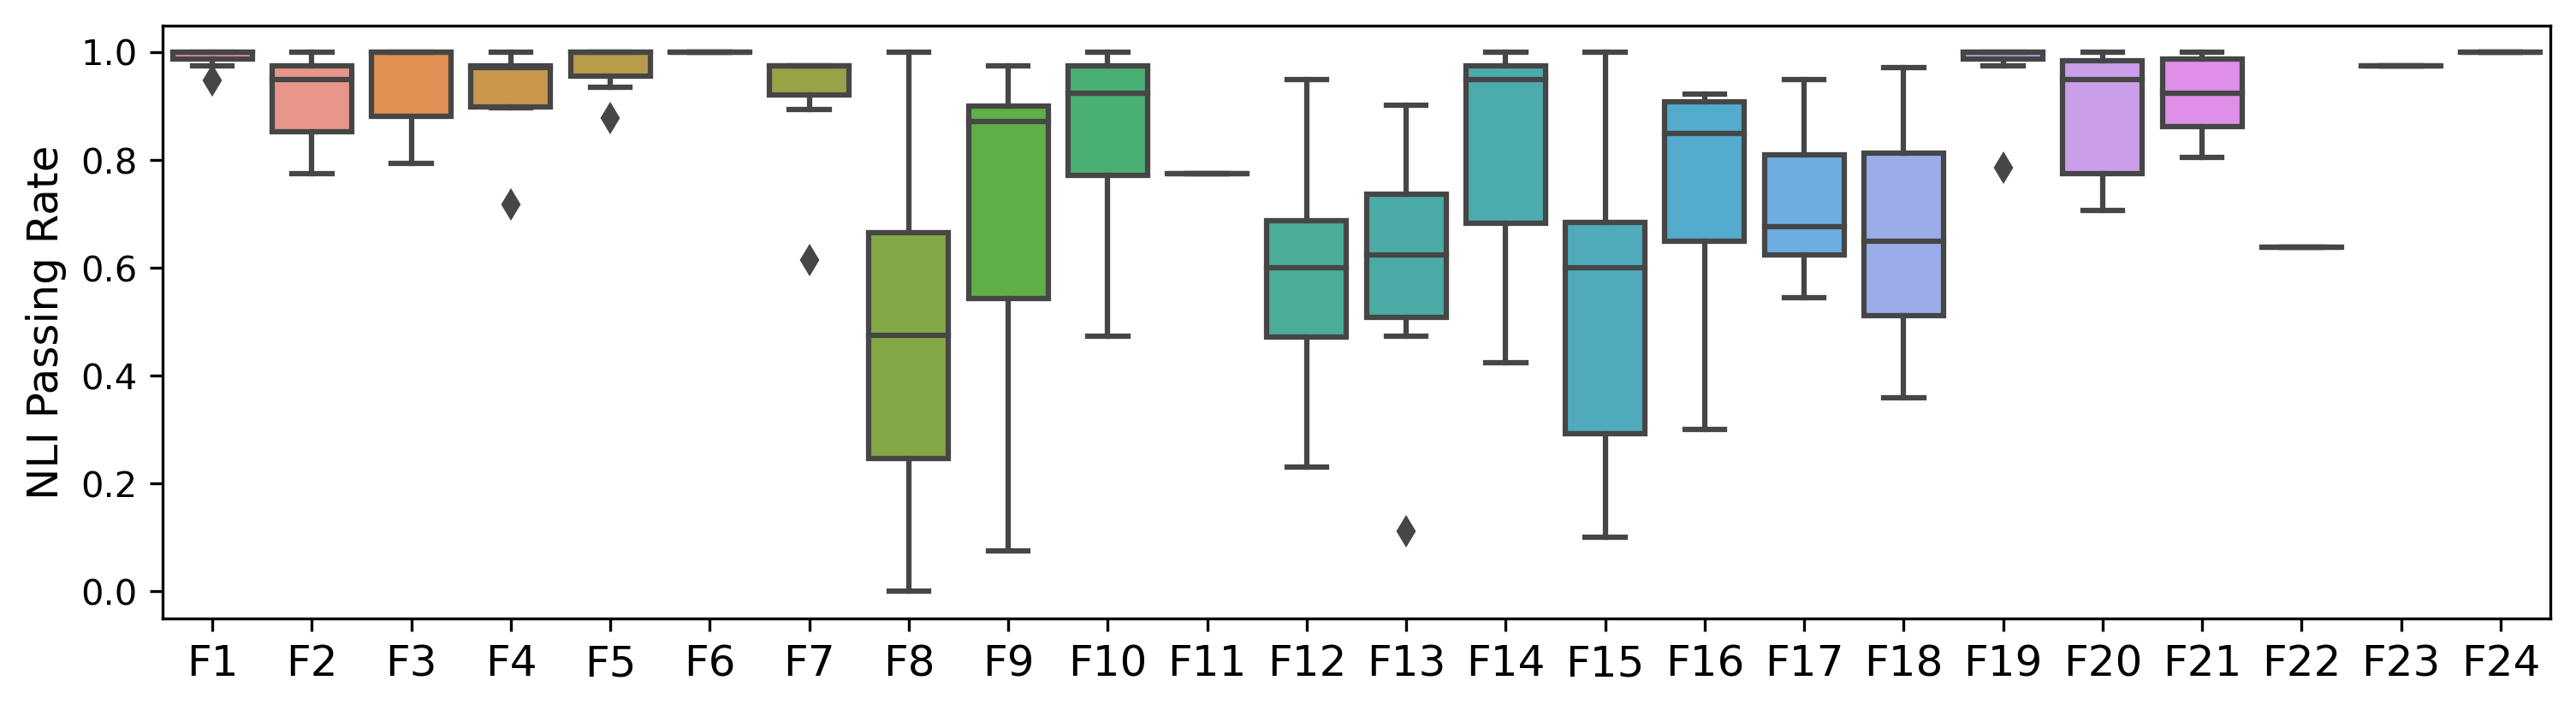

In [120]:
fig, ax = plt.subplots(figsize=(12,3), dpi=300)
#ax.set_xticklabels(l_functionalities, horizontalalignment='right', rotation=45, fontsize=12)
sns.boxplot(data=df_temp, x="functionality", y="NLI-Test Passing Rate", order=labels, orient="v")
#sns.stripplot(data=df_temp, x="functionality", y="NLI-Test Passing Rate", order=labels, legend=False, jitter=False, color='lightgray')

ax.set_xticklabels(labels, horizontalalignment='center', fontsize=12)
ax.set_ylabel('NLI Passing Rate', fontsize=12)
ax.set(xlabel=None)
fig.savefig("passing_rate.png", dpi=300, bbox_inches = "tight")
fig.show()